In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import sklearn
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px


In [2]:
data =pd.read_csv('Loan_Data.csv')
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
num = data.select_dtypes(include = 'number')
cat = data.select_dtypes(exclude = 'number')


display(num.head())
display(cat.head())

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5849,0.0,NaN,360.0,1.0
1,4583,1508.0,128.0,360.0,1.0
2,3000,0.0,66.0,360.0,1.0
3,2583,2358.0,120.0,360.0,1.0
4,6000,0.0,141.0,360.0,1.0


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,Urban,Y
4,LP001008,Male,No,0,Graduate,No,Urban,Y


In [4]:
# TO SEE THE VALUES OF THE COLUMN BY SELECTING SAMPLE ROWS
data['Dependents'].sample(200).values
# TO REPLACE THE VALUES 
data['Dependents'] = data['Dependents'].str.replace('+','')
data['Dependents']= data['Dependents'].astype(float)
data['Dependents'].dtypes

dtype('float64')

In [5]:
# reseperate the columns to see the effect of the changes previously made
num = data.select_dtypes(include = 'number')
cat = data.select_dtypes(exclude = 'number')


display(num.head())
display(cat.head())

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,0.0,5849,0.0,NaN,360.0,1.0
1,1.0,4583,1508.0,128.0,360.0,1.0
2,0.0,3000,0.0,66.0,360.0,1.0
3,0.0,2583,2358.0,120.0,360.0,1.0
4,0.0,6000,0.0,141.0,360.0,1.0


,Loan_ID,Gender,Married,Education,Self_Employed,Property_Area,Loan_Status
0,LP001002,Male,No,Graduate,No,Urban,Y
1,LP001003,Male,Yes,Graduate,No,Rural,N
2,LP001005,Male,Yes,Graduate,Yes,Urban,Y
3,LP001006,Male,Yes,Not Graduate,No,Urban,Y
4,LP001008,Male,No,Graduate,No,Urban,Y


In [6]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [7]:
def cleaner(dataframe):
    for i in dataframe.columns: # ---------------------------------------------- Iterate through the columns of the data
        if ((dataframe[i].isnull().sum() / len(dataframe)) * 100) > 30: # ------ Check if the columns has above 30% of its data
            dataframe.drop(i, axis = 1, inplace = True)# ----------------------- Drop such columns
        elif dataframe[i].dtypes == 'O': # ------------------------------------- Select all categorical columns
            dataframe[i].fillna(dataframe[i].mode()[0], inplace = True) # ------ Replace the missing  with the mode
        else:
            dataframe[i].fillna(dataframe[i].median(), inplace = True) # ------- select all numerical columns and clean missing with the median
    return dataframe

In [8]:
data = cleaner(data)
data.isnull().sum().sort_values(ascending = False).head(3)

Loan_ID    0
Gender     0
Married    0
dtype: int64

In [9]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder() # ---------------------------------------------------------- Instantiate encoding library
for i in data.columns: # ------------------------------------------------------ iterate through the columns and find all categoricals
    if data[i].dtypes == 'O': # ----------------------------------------------- select all categoricals
        data[i] = lb.fit_transform(data[i]) # -------------------------------- Transform the selected data.

data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,0,0.0,0,0,5849,0.0,128.0,360.0,1.0,2,1
1,1,1,1,1.0,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,2,1,1,0.0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,3,1,1,0.0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,4,1,0,0.0,0,0,6000,0.0,141.0,360.0,1.0,2,1


<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

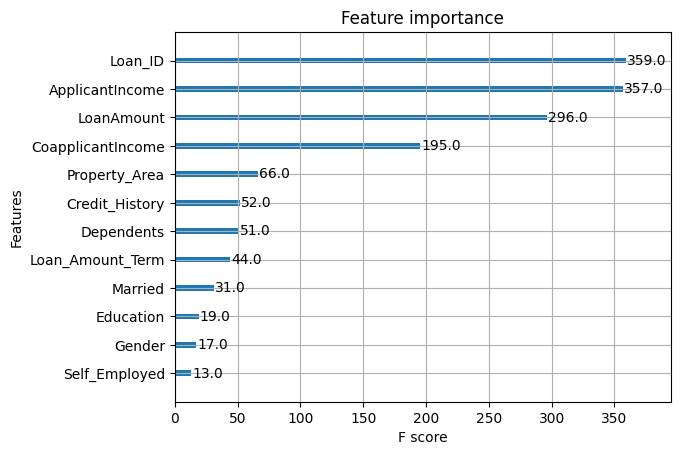

In [10]:
# - Using XGBOOST to find feature importance
x = data.drop('Loan_Status', axis = 1)
y = data['Loan_Status']

import xgboost as xgb
model = xgb.XGBClassifier()
model.fit(x, y)

# Print feature importance scores
xgb.plot_importance(model)

In [37]:
sel_cols = ['ApplicantIncome', 'LoanAmount', 'CoapplicantIncome', 'Property_Area', 'Credit_History', 'Education', 'Dependents','Loan_Status']
sel_data =data[sel_cols]
sel_data

,ApplicantIncome,LoanAmount,CoapplicantIncome,Property_Area,Credit_History,Education,Dependents,Loan_Status
0,5849,128.0,0.0,2,1.0,0,0.0,1
1,4583,128.0,1508.0,0,1.0,0,1.0,0
2,3000,66.0,0.0,2,1.0,0,0.0,1
3,2583,120.0,2358.0,2,1.0,1,0.0,1
4,6000,141.0,0.0,2,1.0,0,0.0,1
...,...,...,...,...,...,...,...,...
609,2900,71.0,0.0,0,1.0,0,0.0,1
610,4106,40.0,0.0,0,1.0,0,3.0,1
611,8072,253.0,240.0,2,1.0,0,1.0,1
612,7583,187.0,0.0,2,1.0,0,2.0,1


In [38]:
# MODELLING WITH LOGISTIC REGRESSION
# SPLIT INTO TRAIN AND TEST


# Split Into Train and Test
x = sel_data.drop('Loan_Status', axis = 1)
y = sel_data.Loan_Status

from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.20, random_state = 98, stratify = y)

print(f'xtrain: {xtrain.shape}')
print(f'xtest: {xtest.shape}')
print('ytrain: {}'.format(ytrain.shape))
print('ytest: {}'.format(ytest.shape))



xtrain: (491, 7)
xtest: (123, 7)
ytrain: (491,)
ytest: (123,)


In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

log_reg = LogisticRegression() # ----------------------------------------------- Instantiate the algorithm

log_reg.fit(xtrain, ytrain) # -------------------------------------------------- Fit the algorithm on the data to create a model
cross_val = log_reg.predict(xtrain) # ----------------------------------------- Cros validate the model
print(classification_report(cross_val, ytrain)) # ----------------------------- View the classification metrics of the model


              precision    recall  f1-score   support

           0       0.47      0.88      0.62        83
           1       0.97      0.80      0.88       408

    accuracy                           0.81       491
   macro avg       0.72      0.84      0.75       491
weighted avg       0.89      0.81      0.83       491



              precision    recall  f1-score   support

           0       0.29      0.85      0.43        13
           1       0.98      0.75      0.85       110

    accuracy                           0.76       123
   macro avg       0.63      0.80      0.64       123
weighted avg       0.90      0.76      0.81       123



<Axes: >

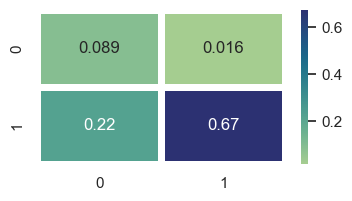

In [40]:
print(classification_report(log_reg.predict(xtest), ytest))
revealer = confusion_matrix(log_reg.predict(xtest), ytest)
plt.figure(figsize = (4,2))
sns.set(style = 'darkgrid')
sns.heatmap(revealer/np.sum(revealer), annot=True, cmap='crest', linewidth=5)

In [41]:
# serialise transformers and model
import joblib

joblib.dump(lb,'encoder.pkl') 
joblib.dump(log_reg,'Loan_model.pkl') # to save your model to a file

['Loan_model.pkl']

In [42]:
import joblib
imported_model = joblib.load('Loan_model.pkl')
imported_model

LogisticRegression()

In [43]:
# new patients data to predict the classes of their kidney
# new_patients = df.iloc[2:10].drop('classes', axis = 1)
# new_patients
new_loan = data.sample(10).drop('Loan_Status', axis = 1)
new_loan

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
52,52,0,0,0.0,0,0,4230,0.0,112.0,360.0,1.0,1
257,257,1,1,3.0,0,0,5250,0.0,94.0,360.0,1.0,2
161,161,1,1,0.0,0,0,7933,0.0,275.0,360.0,1.0,2
280,280,1,0,1.0,1,1,4053,2426.0,158.0,360.0,0.0,2
403,403,0,0,0.0,1,0,1963,0.0,53.0,360.0,1.0,1
447,447,1,1,0.0,0,0,3539,1376.0,55.0,360.0,1.0,0
219,219,0,1,2.0,0,0,4283,2383.0,127.0,360.0,1.0,1
380,380,1,1,0.0,0,0,3333,2500.0,128.0,360.0,1.0,1
569,569,1,1,0.0,0,0,3166,2064.0,104.0,360.0,0.0,2
260,260,1,1,1.0,0,0,6083,4250.0,330.0,360.0,1.0,2


In [44]:
new_loan = new_loan[sel_cols[:-1]]
new_loan.dropna(inplace = True)
new_loan

,ApplicantIncome,LoanAmount,CoapplicantIncome,Property_Area,Credit_History,Education,Dependents
52,4230,112.0,0.0,1,1.0,0,0.0
257,5250,94.0,0.0,2,1.0,0,3.0
161,7933,275.0,0.0,2,1.0,0,0.0
280,4053,158.0,2426.0,2,0.0,1,1.0
403,1963,53.0,0.0,1,1.0,1,0.0
447,3539,55.0,1376.0,0,1.0,0,0.0
219,4283,127.0,2383.0,1,1.0,0,2.0
380,3333,128.0,2500.0,1,1.0,0,0.0
569,3166,104.0,2064.0,2,0.0,0,0.0
260,6083,330.0,4250.0,2,1.0,0,1.0


In [45]:
imported_model.predict(new_loan)

array([1, 1, 1, 0, 1, 1, 1, 1, 0, 1])

In [46]:
# batch predict and save the predicted patients into a new column called predicted patients
new_loan['predicted_loan'] = imported_model.predict(new_loan)
new_loan

,ApplicantIncome,LoanAmount,CoapplicantIncome,Property_Area,Credit_History,Education,Dependents,predicted_loan
52,4230,112.0,0.0,1,1.0,0,0.0,1
257,5250,94.0,0.0,2,1.0,0,3.0,1
161,7933,275.0,0.0,2,1.0,0,0.0,1
280,4053,158.0,2426.0,2,0.0,1,1.0,0
403,1963,53.0,0.0,1,1.0,1,0.0,1
447,3539,55.0,1376.0,0,1.0,0,0.0,1
219,4283,127.0,2383.0,1,1.0,0,2.0,1
380,3333,128.0,2500.0,1,1.0,0,0.0,1
569,3166,104.0,2064.0,2,0.0,0,0.0,0
260,6083,330.0,4250.0,2,1.0,0,1.0,1
